<a href="https://colab.research.google.com/github/jx-dohwan/Aiffel_EGLMS_Project/blob/main/%5BExp_4%5D_Time_Series(apple%2C_BRK%2C_BABA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [Exp_4] Time-Series(apple, BRK, BABA)


- LMS와 버전이 맞는 statsmodels를 설치한다.

In [1]:
! pip install statsmodels==0.13.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

## 1. 시계열 데이터 준비
  - 종가(Close) 데이터만 사용

In [3]:
apple_data = pd.read_csv('/content/drive/MyDrive/인공지능/아이펠/ES/data/AAPL_2y.csv', index_col='Date', parse_dates=True)
BRK_data = pd.read_csv('/content/drive/MyDrive/인공지능/아이펠/ES/data/BRK-B.csv', index_col='Date', parse_dates=True)
BABA_data = pd.read_csv('/content/drive/MyDrive/인공지능/아이펠/ES/data/BABA.csv', index_col='Date', parse_dates=True)


apple_ts = apple_data['Close']
BRK_ts = BRK_data['Close']
BABA_ts = BABA_data['Close']

print('애플 : ',apple_ts.head())
print()
print('버크셔해서웨이 : ',BRK_ts.head())
print()
print('알리바바 : ', BABA_ts.head())

애플 :  Date
2020-07-27     94.809998
2020-07-28     93.252502
2020-07-29     95.040001
2020-07-30     96.190002
2020-07-31    106.260002
Name: Close, dtype: float64

버크셔해서웨이 :  Date
2020-07-27    192.139999
2020-07-28    194.119995
2020-07-29    196.410004
2020-07-30    194.300003
2020-07-31    195.779999
Name: Close, dtype: float64

알리바바 :  Date
2020-07-27    250.860001
2020-07-28    249.050003
2020-07-29    252.449997
2020-07-30    252.740005
2020-07-31    251.020004
Name: Close, dtype: float64


## 2. 각종 전처리 수행

### 1) 결측치 처리

In [4]:
# 애플 데이터
apple_ts = apple_ts.interpolate(method='time') # 보간법 사용
apple_ts[apple_ts.isna()] 

Series([], Name: Close, dtype: float64)

In [5]:
# 버크셔해서웨이 데이터
BRK_ts = BRK_ts.interpolate(method='time') # 보간법 사용
BRK_ts[BRK_ts.isna()]

Series([], Name: Close, dtype: float64)

In [6]:
# 알리바바 데이터
BABA_ts = BABA_ts.interpolate(method='time') # 보간법 사용
BABA_ts[BABA_ts.isna()]

Series([], Name: Close, dtype: float64)

### 2) 로그변환

In [7]:
# 애플 데이터
apple_ts_log = np.log(apple_ts)
apple_ts_log

Date
2020-07-27    4.551875
2020-07-28    4.535311
2020-07-29    4.554298
2020-07-30    4.566325
2020-07-31    4.665889
                ...   
2022-07-18    4.990909
2022-07-19    5.017280
2022-07-20    5.030699
2022-07-21    5.045681
2022-07-22    5.037537
Name: Close, Length: 502, dtype: float64

In [8]:
# 버크셔해서웨이 데이터
BRK_ts_log = np.log(BRK_ts)
BRK_ts_log

Date
2020-07-27    5.258224
2020-07-28    5.268476
2020-07-29    5.280204
2020-07-30    5.269403
2020-07-31    5.276992
                ...   
2022-07-18    5.621342
2022-07-19    5.647388
2022-07-20    5.656132
2022-07-21    5.658959
2022-07-22    5.655747
Name: Close, Length: 502, dtype: float64

In [9]:
# 알리바바 데이터
BABA_ts_log = np.log(BABA_ts)
BABA_ts_log

Date
2020-07-27    5.524895
2020-07-28    5.517654
2020-07-29    5.531213
2020-07-30    5.532361
2020-07-31    5.525533
                ...   
2022-07-18    4.636087
2022-07-19    4.651577
2022-07-20    4.644006
2022-07-21    4.655198
2022-07-22    4.611252
Name: Close, Length: 502, dtype: float64

## 3. 시계열 안정성 분석

### 1) 정성적 그래프 분석

In [10]:
def plot_rolling_statistics(timeseries, window=12):
    
    rolmean = timeseries.rolling(window=window).mean()  # 이동평균 시계열
    rolstd = timeseries.rolling(window=window).std()    # 이동표준편차 시계열

     # 원본시계열, 이동평균, 이동표준편차를 plot으로 시각화해 본다.
    orig = plt.plot(timeseries, color='blue',label='Original')    
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

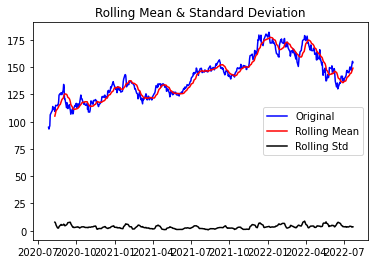

In [11]:
# 애플 데이터
plot_rolling_statistics(apple_ts, window=12)

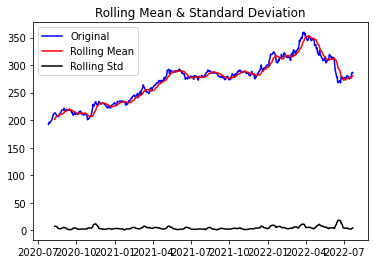

In [12]:
# 버크셔해서웨이 데이터
plot_rolling_statistics(BRK_ts, window=12)

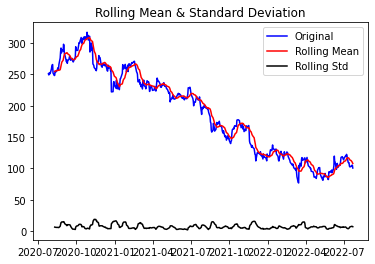

In [13]:
# 알리바바 데이터
plot_rolling_statistics(BABA_ts, window=12)

### 2) 정량적 Augmented Dicky-Fuller Test

In [14]:
from statsmodels.tsa.stattools import adfuller

def augmented_dickey_fuller_test(timeseries):
    dftest = adfuller(timeseries, autolag='AIC')  
    
    print('Results of Dickey-Fuller Test:')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [15]:
# 애플 데이터 
augmented_dickey_fuller_test(apple_ts)

Results of Dickey-Fuller Test:
Test Statistic                  -2.414866
p-value                          0.137584
#Lags Used                       0.000000
Number of Observations Used    501.000000
Critical Value (1%)             -3.443470
Critical Value (5%)             -2.867326
Critical Value (10%)            -2.569852
dtype: float64


In [16]:
# 버크셔해서웨이 데이터
augmented_dickey_fuller_test(BRK_ts)

Results of Dickey-Fuller Test:
Test Statistic                  -2.015826
p-value                          0.279677
#Lags Used                       0.000000
Number of Observations Used    501.000000
Critical Value (1%)             -3.443470
Critical Value (5%)             -2.867326
Critical Value (10%)            -2.569852
dtype: float64


In [17]:
# 알리바바 데이터
augmented_dickey_fuller_test(BABA_ts)

Results of Dickey-Fuller Test:
Test Statistic                  -0.636790
p-value                          0.862450
#Lags Used                       4.000000
Number of Observations Used    497.000000
Critical Value (1%)             -3.443576
Critical Value (5%)             -2.867373
Critical Value (10%)            -2.569877
dtype: float64


### 3) 시계열 분해(Time Series Decomposition)

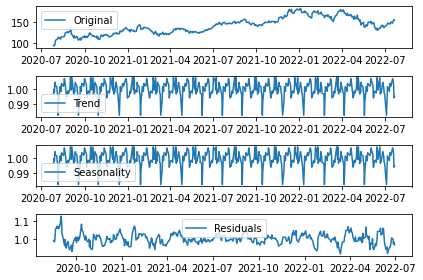

In [18]:
# 애플 데이터
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(apple_ts, model='multiplicative',period = 30)

trend = decompositionseasonal = decomposition.seasonal
seasonal = decomposition.seasonal
apple_residual = decomposition.resid

plt.subplot(411)
plt.plot(apple_ts, label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(apple_residual, label='Residuals')
plt.legend(loc='best')

plt.tight_layout()

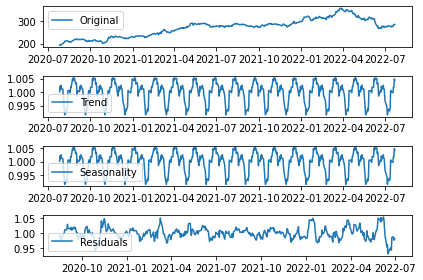

In [19]:
# 버크셔해서웨이 데이터
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(BRK_ts, model='multiplicative',period = 30)

trend = decompositionseasonal = decomposition.seasonal
seasonal = decomposition.seasonal
BRK_residual = decomposition.resid

plt.subplot(411)
plt.plot(BRK_ts, label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(BRK_residual, label='Residuals')
plt.legend(loc='best')

plt.tight_layout()

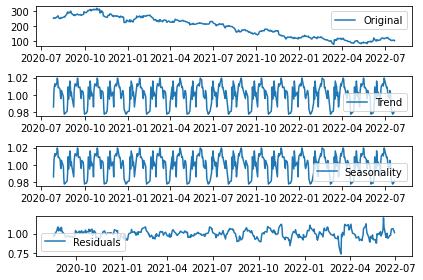

In [20]:
# 알리바바 데이터
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(BABA_ts, model='multiplicative',period = 30)

trend = decompositionseasonal = decomposition.seasonal
seasonal = decomposition.seasonal
BABA_residual = decomposition.resid

plt.subplot(411)
plt.plot(BABA_ts, label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(BABA_residual, label='Residuals')
plt.legend(loc='best')

plt.tight_layout()

### 4) Residual 안정성 확인

In [21]:
# 애플 데이터
apple_residual.dropna(inplace=True)
augmented_dickey_fuller_test(apple_residual)

Results of Dickey-Fuller Test:
Test Statistic                -8.745944e+00
p-value                        2.922694e-14
#Lags Used                     1.100000e+01
Number of Observations Used    4.600000e+02
Critical Value (1%)           -3.444646e+00
Critical Value (5%)           -2.867844e+00
Critical Value (10%)          -2.570128e+00
dtype: float64


In [22]:
# 버크셔해서웨이 데이터
BRK_residual.dropna(inplace=True)
augmented_dickey_fuller_test(BRK_residual)

Results of Dickey-Fuller Test:
Test Statistic                -6.538454e+00
p-value                        9.478071e-09
#Lags Used                     1.700000e+01
Number of Observations Used    4.540000e+02
Critical Value (1%)           -3.444836e+00
Critical Value (5%)           -2.867927e+00
Critical Value (10%)          -2.570172e+00
dtype: float64


In [23]:
# 알리바바 데이터
BABA_residual.dropna(inplace=True)
augmented_dickey_fuller_test(BABA_residual)

Results of Dickey-Fuller Test:
Test Statistic                -8.152947e+00
p-value                        9.586774e-13
#Lags Used                     9.000000e+00
Number of Observations Used    4.620000e+02
Critical Value (1%)           -3.444584e+00
Critical Value (5%)           -2.867816e+00
Critical Value (10%)          -2.570113e+00
dtype: float64


## 4. 학습, 테스트 데이터셋 생성

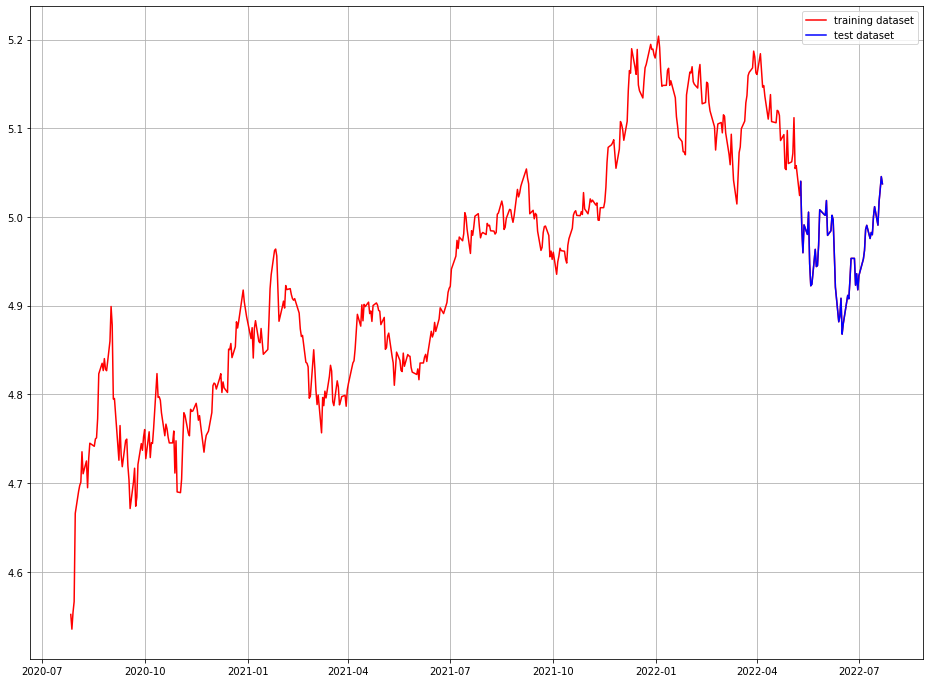

In [24]:
# 애플 데이터
apple_train_data, apple_test_data = apple_ts_log[:int(len(apple_ts_log)*0.9)], apple_ts_log[int(len(apple_ts_log)*0.9):]
plt.figure(figsize=(16,12))
plt.grid(True)
plt.plot(apple_ts_log, c='r', label='training dataset')
plt.plot(apple_test_data, c='b', label='test dataset')
plt.legend()

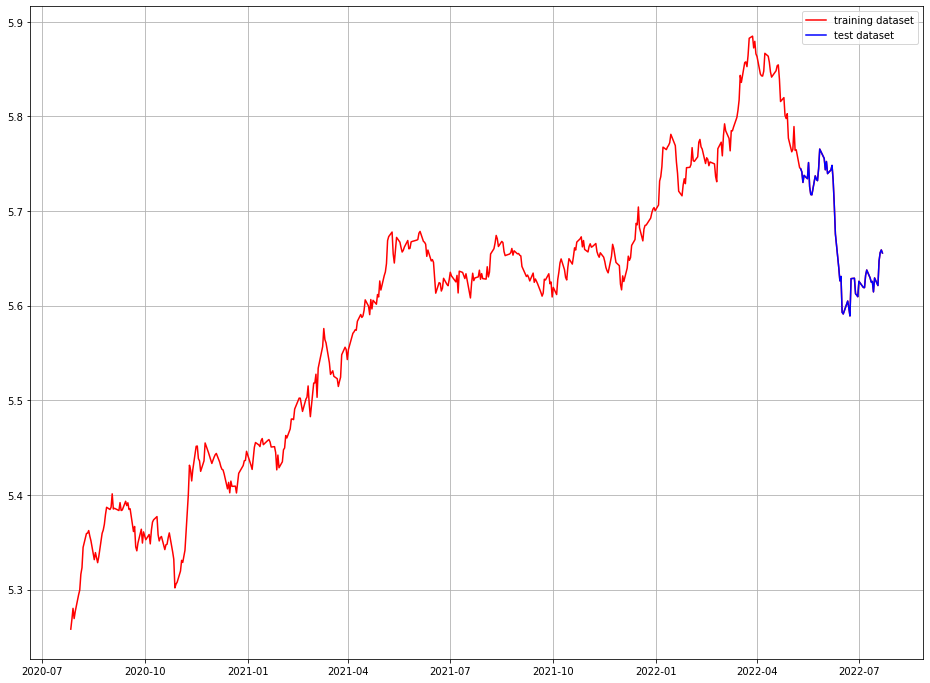

In [25]:
# 버크셔해서웨이 데이터
BRK_train_data, BRK_test_data = BRK_ts_log[:int(len(BRK_ts_log)*0.9)], BRK_ts_log[int(len(BRK_ts_log)*0.9):]
plt.figure(figsize=(16,12))
plt.grid(True)
plt.plot(BRK_ts_log, c='r', label='training dataset')
plt.plot(BRK_test_data, c='b', label='test dataset')
plt.legend()

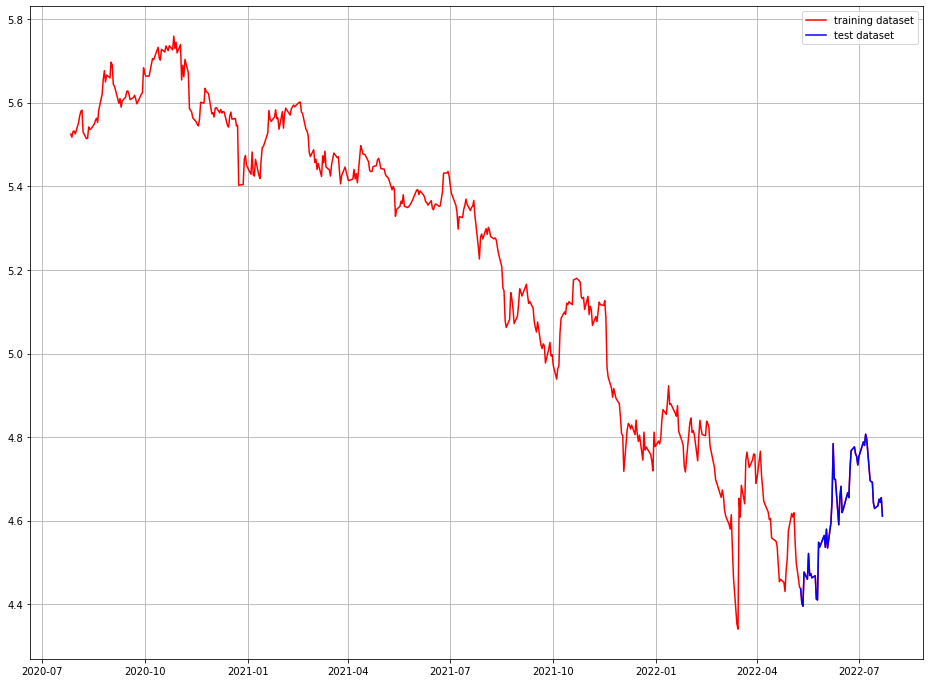

In [26]:
# 알리바바 데이터
BABA_train_data, BABA_test_data = BABA_ts_log[:int(len(BABA_ts_log)*0.9)], BABA_ts_log[int(len(BABA_ts_log)*0.9):]
plt.figure(figsize=(16,12))
plt.grid(True)
plt.plot(BABA_ts_log, c='r', label='training dataset')
plt.plot(BABA_test_data, c='b', label='test dataset')
plt.legend()

## 5. 적정 ARIMA모수 찾기

### 1) ACF, PACF 그려보기 -> p, q구하기
  - 아래의 링크를 참조하여 p, d, q값 구함
    - https://rstatistics.tistory.com/80
    - https://aliencoder.tistory.com/11

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


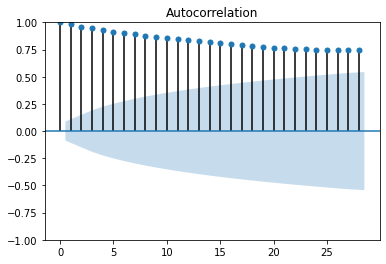

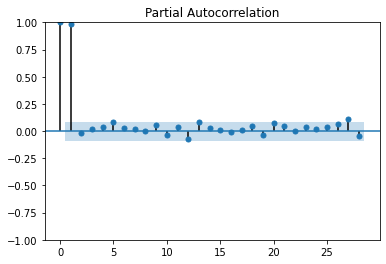

In [27]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# 애플 데이터
plot_acf(apple_ts_log)
plot_pacf(apple_ts_log)
plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


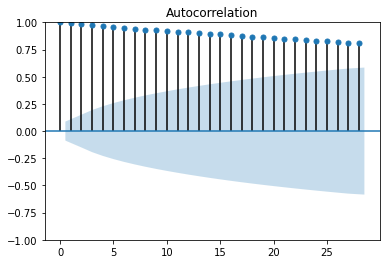

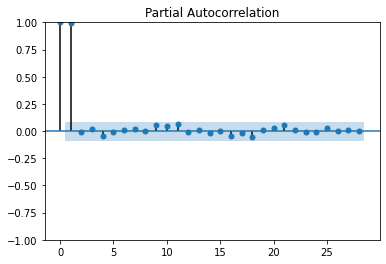

In [28]:
# 버크셔해서웨이 데이터
plot_acf(BRK_ts_log)
plot_pacf(BRK_ts_log)
plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


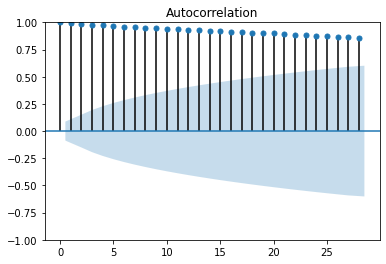

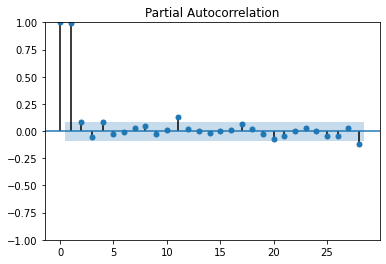

In [29]:
# 알리바바 데이터
plot_acf(BABA_ts_log)
plot_pacf(BABA_ts_log)
plt.show()

### 3) 차분 안정성 확인 -> d구하기

Results of Dickey-Fuller Test:
Test Statistic                 -23.012155
p-value                          0.000000
#Lags Used                       0.000000
Number of Observations Used    500.000000
Critical Value (1%)             -3.443496
Critical Value (5%)             -2.867338
Critical Value (10%)            -2.569858
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                -9.695525e+00
p-value                        1.107032e-16
#Lags Used                     1.600000e+01
Number of Observations Used    4.830000e+02
Critical Value (1%)           -3.443962e+00
Critical Value (5%)           -2.867543e+00
Critical Value (10%)          -2.569967e+00
dtype: float64


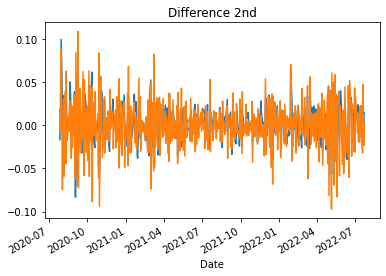

In [30]:
# 애플 데이터
# 1차 차분
apple_diff_1 = apple_ts_log.diff(periods=1).iloc[1:]
apple_diff_1.plot(title='Difference 1st')
augmented_dickey_fuller_test(apple_diff_1)

# 2차 차분
apple_diff_2 = apple_diff_1.diff(periods=1).iloc[1:]
apple_diff_2.plot(title='Difference 2nd')
augmented_dickey_fuller_test(apple_diff_2)

Results of Dickey-Fuller Test:
Test Statistic                 -21.166345
p-value                          0.000000
#Lags Used                       0.000000
Number of Observations Used    500.000000
Critical Value (1%)             -3.443496
Critical Value (5%)             -2.867338
Critical Value (10%)            -2.569858
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                -1.072836e+01
p-value                        3.024384e-19
#Lags Used                     1.500000e+01
Number of Observations Used    4.840000e+02
Critical Value (1%)           -3.443933e+00
Critical Value (5%)           -2.867530e+00
Critical Value (10%)          -2.569961e+00
dtype: float64


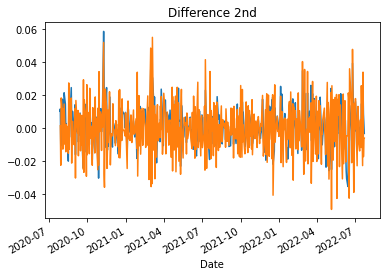

In [31]:
# 버크셔해서웨이 데이터
# 1차 차분
BRK_diff_1 = BRK_ts_log.diff(periods=1).iloc[1:]
BRK_diff_1.plot(title='Difference 1st')
augmented_dickey_fuller_test(BRK_diff_1)

# 2차 차분
BRK_diff_2 = BRK_diff_1.diff(periods=1).iloc[1:]
BRK_diff_2.plot(title='Difference 2nd')
augmented_dickey_fuller_test(BRK_diff_2)

Results of Dickey-Fuller Test:
Test Statistic                -1.414089e+01
p-value                        2.247139e-26
#Lags Used                     2.000000e+00
Number of Observations Used    4.980000e+02
Critical Value (1%)           -3.443549e+00
Critical Value (5%)           -2.867361e+00
Critical Value (10%)          -2.569870e+00
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                -9.722570e+00
p-value                        9.457941e-17
#Lags Used                     1.700000e+01
Number of Observations Used    4.820000e+02
Critical Value (1%)           -3.443990e+00
Critical Value (5%)           -2.867555e+00
Critical Value (10%)          -2.569974e+00
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                -1.168954e+01
p-value                        1.665498e-21
#Lags Used                     1.800000e+01
Number of Observations Used    4.800000e+02
Critical Value (1%)           -3.444047e+00
Critical Value (5%)           -2.867580e+

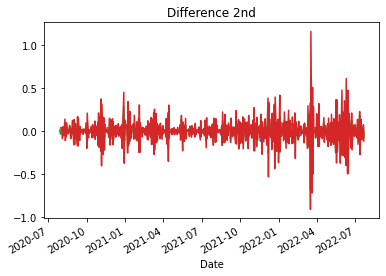

In [32]:
# 알리바바 데이터
# 1차 차분
BABA_diff_1 = BABA_ts_log.diff(periods=1).iloc[1:]
BABA_diff_1.plot(title='Difference 1st')
augmented_dickey_fuller_test(BABA_diff_1)

# 2차 차분
BABA_diff_2 = BABA_diff_1.diff(periods=1).iloc[1:]
BABA_diff_2.plot(title='Difference 2nd')
augmented_dickey_fuller_test(BABA_diff_2)

# 3차 차분
BABA_diff_3 = BABA_diff_2.diff(periods=1).iloc[1:]
BABA_diff_3.plot(title='Difference 2nd')
augmented_dickey_fuller_test(BABA_diff_3)

# 4차 차분
BABA_diff_4 = BABA_diff_3.diff(periods=1).iloc[1:]
BABA_diff_4.plot(title='Difference 2nd')
augmented_dickey_fuller_test(BABA_diff_4)

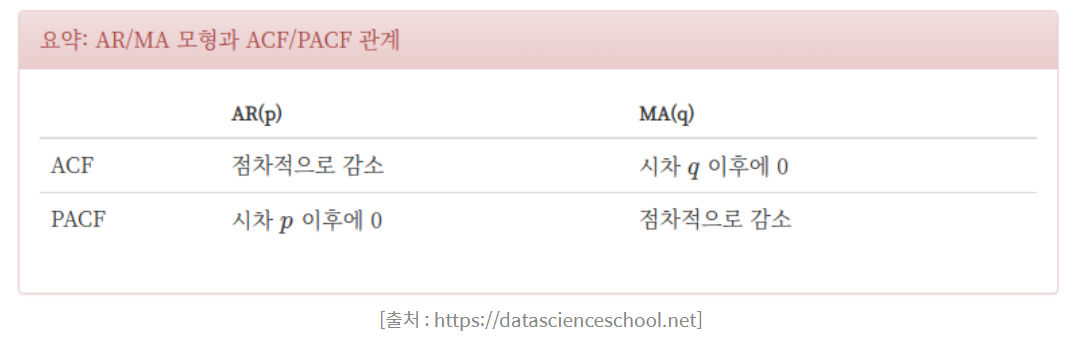

- 애플, 버크셔해서웨이, 알리바바 세 기업 모두 ACF는 점차 감소하고 있고 PACF는 시차 p이후에 0으로 떨어졌기 때문에 AR(p)를 적용하고자 한다. 
-  ACF를 통해 MA 모델의 시차 q를 결정하고, PACF를 통해 AR 모델의 시차 p를 결정할 수 있므로 애플, 알리바바, 버크셔해서웨이 모두 p 값은 2인 것으로 확인되었다.
- 차분결과 애플, 버크셔해서웨이는 1차 차분 결과 유의성이 0.05이하로 유의성있다고 판단하여 차분값 1을 넣어주었고 알리바바의 경우는 4차 차분까지 하였지만 유의성을 찾지 못하여 차분값은 0으로 지정하였다.

## 6.ARIMA 모델 훈련과 테스트

### 1) ARIMA 모델 빌드와 훈련

In [33]:
from statsmodels.tsa.arima.model import ARIMA

# 애플 데이터
apple_model = ARIMA(apple_train_data, order=(2, 1, 0))  
apple_fitted_m = apple_model.fit() 

print(apple_fitted_m.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:595: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:595: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:595: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  451
Model:                 ARIMA(2, 1, 0)   Log Likelihood                1127.692
Date:                Fri, 29 Jul 2022   AIC                          -2249.384
Time:                        08:32:07   BIC                          -2237.056
Sample:                             0   HQIC                         -2244.525
                                - 451                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0289      0.043     -0.674      0.500      -0.113       0.055
ar.L2          0.0017      0.038      0.046      0.964      -0.072       0.075
sigma2         0.0004   1.81e-05     21.562      0.0

In [34]:
# 버크셔해서웨이 데이터
BRK_model = ARIMA(BRK_train_data, order=(2, 1, 0))  
BRK_fitted_m = BRK_model.fit() 

print(BRK_fitted_m.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:595: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:595: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:595: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  451
Model:                 ARIMA(2, 1, 0)   Log Likelihood                1392.991
Date:                Fri, 29 Jul 2022   AIC                          -2779.981
Time:                        08:32:07   BIC                          -2767.654
Sample:                             0   HQIC                         -2775.122
                                - 451                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0425      0.041      1.048      0.295      -0.037       0.122
ar.L2          0.0110      0.046      0.239      0.811      -0.079       0.101
sigma2         0.0001    5.9e-06     20.309      0.0

In [35]:
# 알리바바 데이터
BABA_model = ARIMA(BABA_train_data, order=(2, 0, 0))  
BABA_fitted_m = BABA_model.fit() 

print(BABA_fitted_m.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:595: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:595: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:595: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  451
Model:                 ARIMA(2, 0, 0)   Log Likelihood                 887.019
Date:                Fri, 29 Jul 2022   AIC                          -1766.038
Time:                        08:32:10   BIC                          -1749.592
Sample:                             0   HQIC                         -1759.556
                                - 451                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0718      0.411     12.354      0.000       4.267       5.876
ar.L1          0.9595      0.045     21.410      0.000       0.872       1.047
ar.L2          0.0381      0.045      0.837      0.4

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


### 2) 모델 테스트 및 플로팅

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:393: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


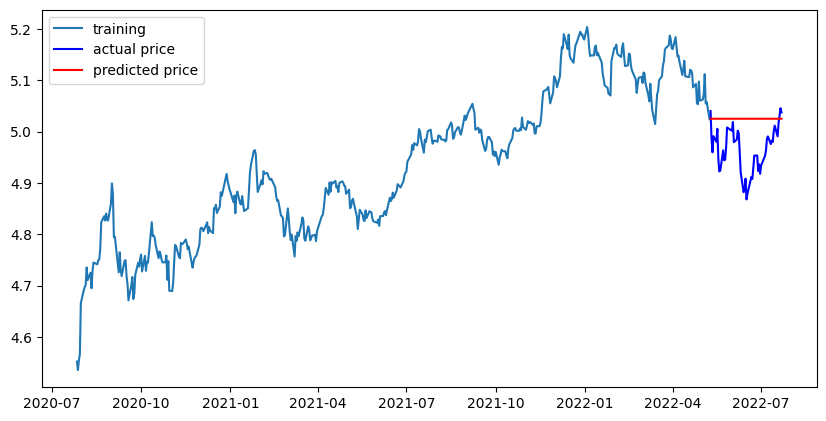

In [36]:
# 애플 데이터
# fc에 결과를 담는다.
apple_fc = apple_fitted_m.forecast(len(apple_test_data), alpha=0.05)
apple_fc = np.array(apple_fc)
apple_fc_series = pd.Series(apple_fc, index=apple_test_data.index)

plt.figure(figsize=(10,5), dpi=100)
plt.plot(apple_train_data, label = 'training')
plt.plot(apple_test_data, c='b', label='actual price')
plt.plot(apple_fc_series, c='r', label='predicted price')
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:393: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


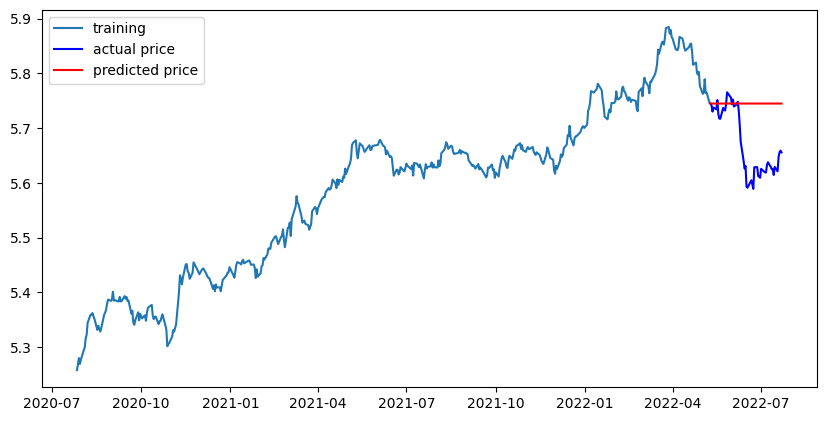

In [37]:
# 버크셔해서웨이 데이터
# fc에 결과를 담는다.
BRK_fc = BRK_fitted_m.forecast(len(BRK_test_data), alpha=0.05)
BRK_fc = np.array(BRK_fc)
BRK_fc_series = pd.Series(BRK_fc, index=BRK_test_data.index)

plt.figure(figsize=(10,5), dpi=100)
plt.plot(BRK_train_data, label = 'training')
plt.plot(BRK_test_data, c='b', label='actual price')
plt.plot(BRK_fc_series, c='r', label='predicted price')
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:393: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


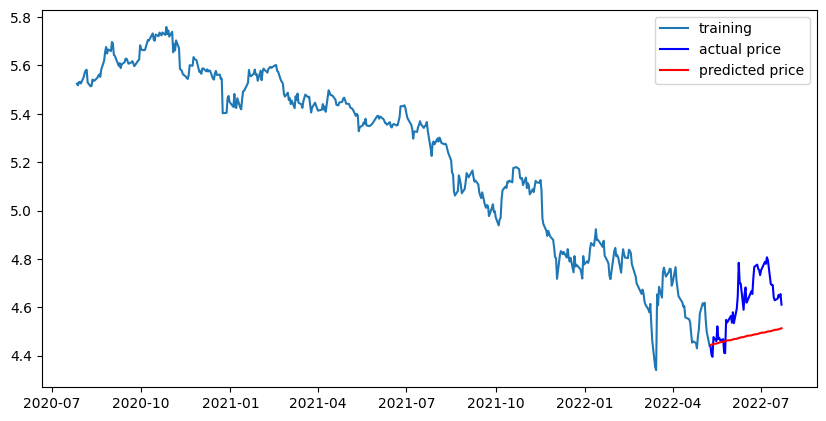

In [38]:
# 알리바바 데이터
# fc에 결과를 담는다.
BABA_fc = BABA_fitted_m.forecast(len(BABA_test_data), alpha=0.05)
BABA_fc = np.array(BABA_fc)
BABA_fc_series = pd.Series(BABA_fc, index=BABA_test_data.index)

plt.figure(figsize=(10,5), dpi=100)
plt.plot(BABA_train_data, label = 'training')
plt.plot(BABA_test_data, c='b', label='actual price')
plt.plot(BABA_fc_series, c='r', label='predicted price')
plt.legend()
plt.show()

### 3) 최종 에측 모델 정확도 측정(MAPE)

In [39]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

# 애플 데이터
apple_mse = mean_squared_error(np.exp(apple_test_data), np.exp(apple_fc))
print('MSE : ',apple_mse)

apple_mse = mean_absolute_error(np.exp(apple_test_data), np.exp(apple_fc))
print('MSE : ', apple_mse)

apple_rmse = math.sqrt(mean_squared_error(np.exp(apple_test_data), np.exp(apple_fc)))
print('RMSE : ', apple_rmse)

apple_mape = np.mean(np.abs(np.exp(apple_fc) - np.exp(apple_test_data))/np.abs(np.exp(apple_test_data)))
print('MAPE : {:.2f}%'.format(apple_mape*100))

MSE :  115.27759331243982
MSE :  9.07785180636873
RMSE :  10.736740348562027
MAPE : 6.51%


In [40]:
# 버크셔해서웨이 데이터
BRK_mse = mean_squared_error(np.exp(BRK_test_data), np.exp(BRK_fc))
print('MSE : ',BRK_mse)

BRK_mse = mean_absolute_error(np.exp(BRK_test_data), np.exp(BRK_fc))
print('MSE : ', BRK_mse)

BRK_rmse = math.sqrt(mean_squared_error(np.exp(BRK_test_data), np.exp(BRK_fc)))
print('RMSE : ', BRK_rmse)

BRK_mape = np.mean(np.abs(np.exp(BRK_fc) - np.exp(BRK_test_data))/np.abs(np.exp(BRK_test_data)))
print('MAPE : {:.2f}%'.format(BRK_mape*100))

MSE :  731.0102660870278
MSE :  21.52791116018377
RMSE :  27.03720152099747
MAPE : 7.73%


In [41]:
# 알리바바 데이터
BABA_mse = mean_squared_error(np.exp(BABA_test_data), np.exp(BABA_fc))
print('MSE : ',BABA_mse)

BABA_mse = mean_absolute_error(np.exp(BABA_test_data), np.exp(BABA_fc))
print('MSE : ', BABA_mse)

BABA_rmse = math.sqrt(mean_squared_error(np.exp(BABA_test_data), np.exp(BABA_fc)))
print('RMSE : ', BABA_rmse)

BABA_mape = np.mean(np.abs(np.exp(BABA_fc) - np.exp(BABA_test_data))/np.abs(np.exp(BABA_test_data)))
print('MAPE : {:.2f}%'.format(BABA_mape*100))

MSE :  306.40143168868497
MSE :  14.59134512658633
RMSE :  17.50432608496211
MAPE : 13.39%


# 회고

- 힘들었던 점 
  - p, d, q에 대한 개념을 이해하는데 시간이 오래 걸렸고 다양한 자료들을 찾아 봤는데 다음 링크에 나오는 설명을 통해서 내용을 이해할 수 있었다.
    - https://rstatistics.tistory.com/80
    - https://aliencoder.tistory.com/11
  - LMS 주피터가 아닌 코랩으로 프로젝트를 진행하였는데 statsmodels 패키지 설치에서 애를 먹었었다. 왜냐하면 statsmodels에도 여러 버전이 있는데 무조건 설치하려고 하니 안되었던 것이다. 그래서 LMS와 맞게 13버전으로 설치를 하니 문제를 해결할 수 있었다.

- 공부해야할 것
  - 금융븐석에 대한 도메인 지식이 아예 없고 내용도 이해하기 어렵다는 것을 느꼈다. 내가 금융분석으로 가게 될 지 알수는 없지만 이번 프로젝트를 통해서 도메인 선택과 도메인 지식에 대한 중요성을 깨닫게 되었다.

- 루브릭 조건에 맞추기 위하여 시도한 것
  - p, d, q 값에 대한 개념을 이해하고 적절히 적용하니 MAPE 15% 미만의 기준을 어렵지 않게 맞출 수 있었다.